In [1]:
import numpy as np
import pandas as pd
import sklearn as skl

In [2]:
import os, glob
files = glob.glob("6 Emotions for image classification/*/*")
for file in files :
   f = open(file, "rb") # open to read binary file
   if not b"JFIF" in f.peek(10) :
          f.close()
          os.remove(file)
   else :
          f.close()

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

training_set = image_dataset_from_directory("6 Emotions for image classification", 
                                            validation_split=0.2, 
                                            subset="training", 
                                            label_mode="categorical", 
                                            seed=0, 
                                            image_size=(100,100))


Found 1096 files belonging to 6 classes.
Using 877 files for training.


In [4]:
training_set.class_names

['anger', 'disgust', 'fear', 'happy', 'pain', 'sad']

In [5]:
test_set = image_dataset_from_directory("6 Emotions for image classification", 
                                        validation_split=0.2, 
                                        subset="validation", 
                                        label_mode="categorical", 
                                        seed=0, 
                                        image_size=(100,100))


Found 1096 files belonging to 6 classes.
Using 219 files for validation.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, Dense, Flatten, MaxPooling2D, Dropout

cnn = Sequential()

cnn.add(Input((100,100,3)))
cnn.add(Rescaling(1/255))
cnn.add(Conv2D(32, kernel_size=(3,3),activation= "relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.2))
cnn.add(Dense(6, activation="softmax"))

In [7]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,862 (16.61 MB)

 Trainable params: 4,353,862 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history  = cnn.fit(training_set, epochs=20,validation_data= (test_set), verbose=2)



Epoch 1/20
28/28 - 4s - 128ms/step - accuracy: 0.2064 - loss: 2.4929 - val_accuracy: 0.2237 - val_loss: 1.7461
Epoch 2/20
28/28 - 3s - 106ms/step - accuracy: 0.2873 - loss: 1.7156 - val_accuracy: 0.2648 - val_loss: 1.7086
Epoch 3/20
28/28 - 3s - 110ms/step - accuracy: 0.3466 - loss: 1.6104 - val_accuracy: 0.3242 - val_loss: 1.5944
Epoch 4/20
28/28 - 3s - 94ms/step - accuracy: 0.4401 - loss: 1.4292 - val_accuracy: 0.3699 - val_loss: 1.5503
Epoch 5/20
28/28 - 3s - 98ms/step - accuracy: 0.5735 - loss: 1.2159 - val_accuracy: 0.3562 - val_loss: 1.5828
Epoch 6/20
28/28 - 3s - 95ms/step - accuracy: 0.6488 - loss: 0.9771 - val_accuracy: 0.3836 - val_loss: 1.8079
Epoch 7/20
28/28 - 3s - 100ms/step - accuracy: 0.7697 - loss: 0.7222 - val_accuracy: 0.3379 - val_loss: 2.0019
Epoch 8/20
28/28 - 3s - 99ms/step - accuracy: 0.8392 - loss: 0.5397 - val_accuracy: 0.3881 - val_loss: 2.0161
Epoch 9/20
28/28 - 3s - 96ms/step - accuracy: 0.8848 - loss: 0.3788 - val_accuracy: 0.4064 - val_loss: 2.0240
Epoch 

In [9]:
history.history['accuracy']
score = cnn.evaluate(test_set, verbose=2)
print("Test accuracy for model 1:", round(score[1],3))


7/7 - 0s - 52ms/step - accuracy: 0.3653 - loss: 3.6716
Test accuracy for model 1: 0.365


In [10]:
score

[3.6715664863586426, 0.3652968108654022]

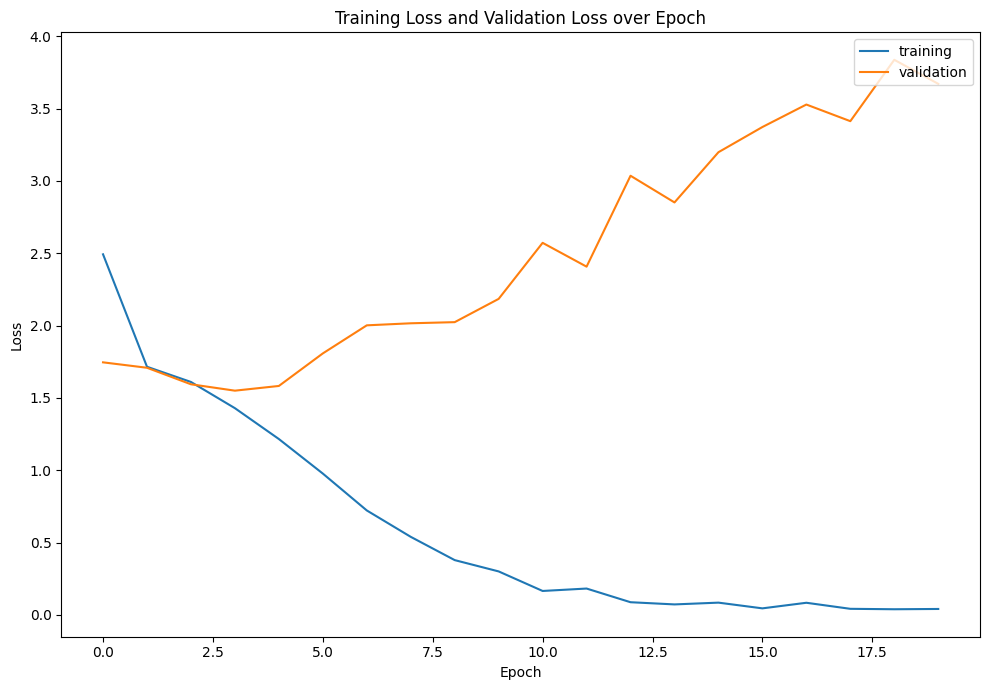

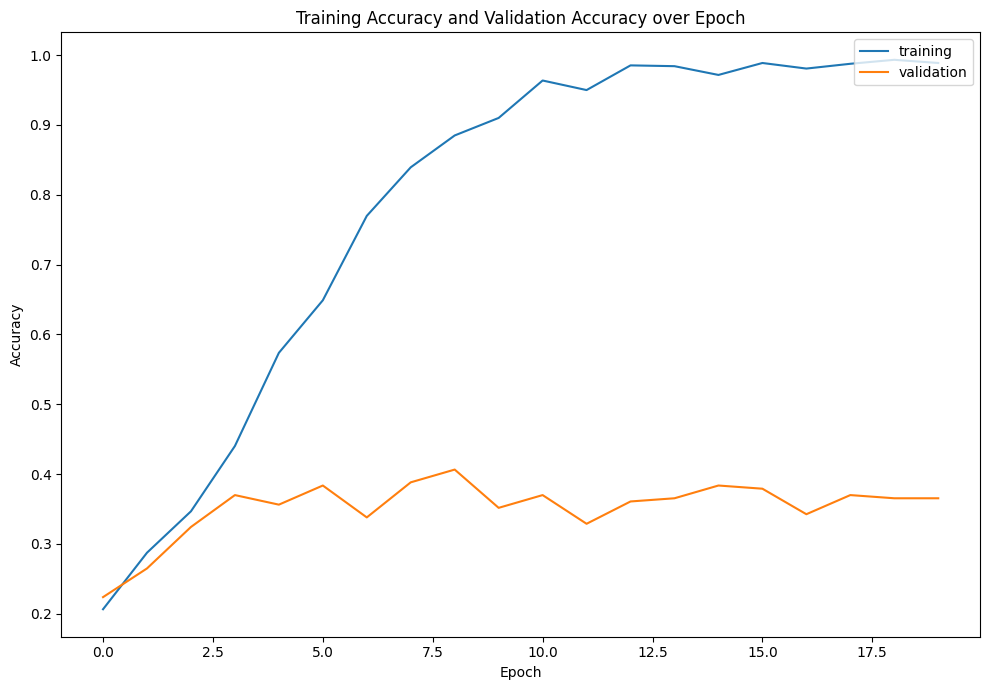

In [11]:
import matplotlib.pyplot as plt
# Visualise the loss propagation over epoch
plt.figure(figsize= [10,7])
plt.title('Training Loss and Validation Loss over Epoch')
plt.plot(history.history['loss'],label = "training")
plt.plot(history.history['val_loss'], label = "validation")
plt.legend(loc = 'upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

plt.figure(figsize= [10,7])
plt.title('Training Accuracy and Validation Accuracy over Epoch')
plt.plot(history.history['accuracy'], label = "training")
plt.plot(history.history['val_accuracy'], label = "validation")
plt.legend(loc = 'upper right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [12]:
from tensorflow.keras.models import load_model

cnn.save('cnn1_model.keras')
cnn1_model = load_model('cnn1_model.keras')

Epoch 1/20
28/28 - 3s - 115ms/step - accuracy: 0.1756 - loss: 2.0515 - val_accuracy: 0.2009 - val_loss: 1.7749
Epoch 2/20
28/28 - 3s - 110ms/step - accuracy: 0.2098 - loss: 1.7692 - val_accuracy: 0.2100 - val_loss: 1.8272
Epoch 3/20
28/28 - 3s - 103ms/step - accuracy: 0.2463 - loss: 1.7374 - val_accuracy: 0.1918 - val_loss: 1.7379
Epoch 4/20
28/28 - 3s - 107ms/step - accuracy: 0.3079 - loss: 1.6648 - val_accuracy: 0.3014 - val_loss: 1.6909
Epoch 5/20
28/28 - 3s - 110ms/step - accuracy: 0.3694 - loss: 1.5543 - val_accuracy: 0.2603 - val_loss: 1.7348
Epoch 6/20
28/28 - 3s - 103ms/step - accuracy: 0.4128 - loss: 1.4641 - val_accuracy: 0.3105 - val_loss: 1.7326
Epoch 7/20
28/28 - 3s - 104ms/step - accuracy: 0.4641 - loss: 1.3365 - val_accuracy: 0.2877 - val_loss: 1.7572
Epoch 8/20
28/28 - 3s - 106ms/step - accuracy: 0.5667 - loss: 1.1776 - val_accuracy: 0.3151 - val_loss: 1.9921
Epoch 9/20
28/28 - 3s - 108ms/step - accuracy: 0.6157 - loss: 1.0506 - val_accuracy: 0.3470 - val_loss: 2.1129
E

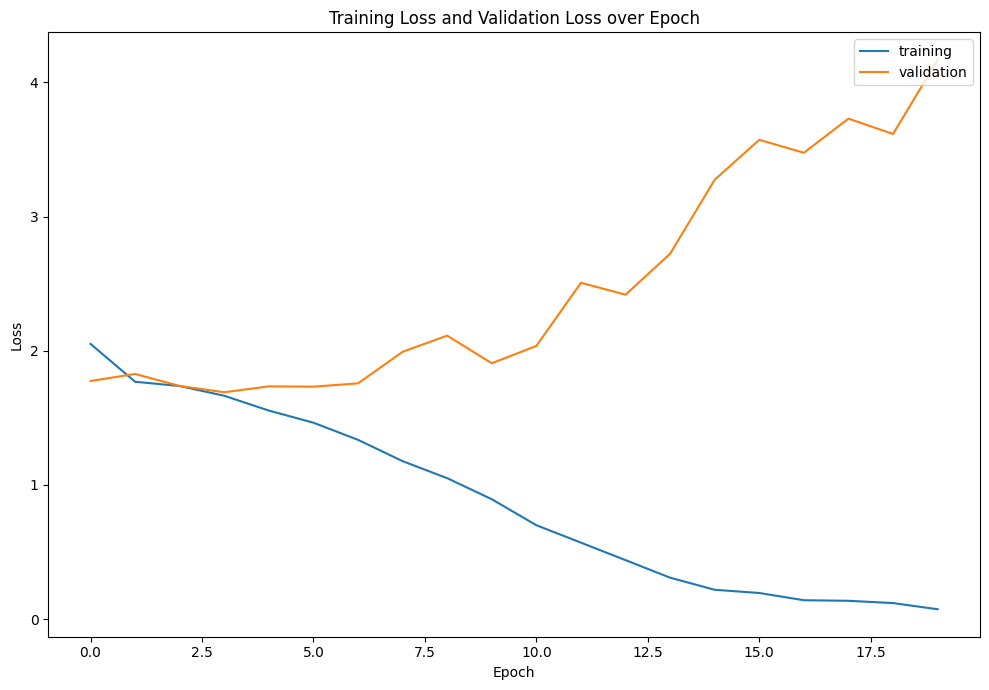

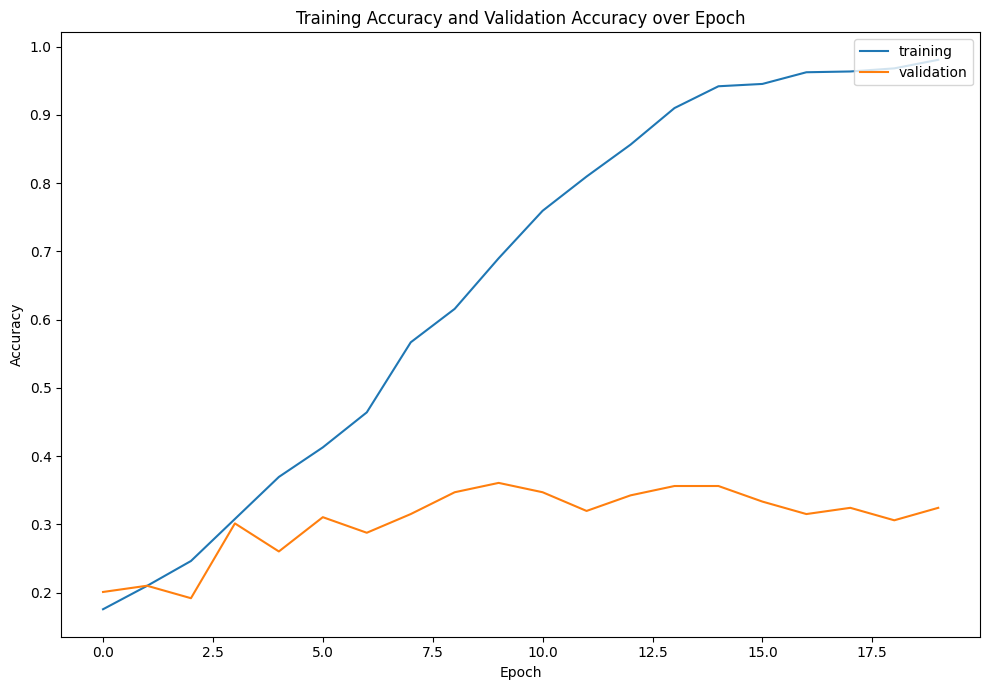

In [13]:
cnn = Sequential()

cnn.add(Input((100,100,3)))
cnn.add(Rescaling(1/255))
cnn.add(Conv2D(32, kernel_size=(5,5),activation= "relu"))
cnn.add(MaxPooling2D(pool_size=(3,3)))
cnn.add(Conv2D(64, (5, 5), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.2))
cnn.add(Dense(6, activation="softmax"))

cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history  = cnn.fit(training_set, epochs=20,validation_data= (test_set), verbose=2)

history.history['accuracy']
score = cnn.evaluate(test_set, verbose=2)
print("Test accuracy:", round(score[1],3))

import matplotlib.pyplot as plt
# Visualise the loss propagation over epoch
plt.figure(figsize= [10,7])
plt.title('Training Loss and Validation Loss over Epoch')
plt.plot(history.history['loss'],label = "training")
plt.plot(history.history['val_loss'], label = "validation")
plt.legend(loc = 'upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

plt.figure(figsize= [10,7])
plt.title('Training Accuracy and Validation Accuracy over Epoch')
plt.plot(history.history['accuracy'], label = "training")
plt.plot(history.history['val_accuracy'], label = "validation")
plt.legend(loc = 'upper right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [14]:
history.history['accuracy']
score = cnn.evaluate(test_set, verbose=2)
print("Test accuracy for model 2:", round(score[1],3))

7/7 - 0s - 59ms/step - accuracy: 0.3242 - loss: 4.1681
Test accuracy for model 2: 0.324


In [15]:
cnn.summary()
cnn.save('cnn2_model.keras')
cnn2_model = load_model('cnn2_model.keras')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       663,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,436,302 (5.48 MB)

 Trainable params: 718,150 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 718,152 (2.74 MB)

In [16]:
from tensorflow.keras.applications import Xception, EfficientNetB0
base_model = EfficientNetB0(include_top  = False)

In [17]:
from tensorflow.keras.layers import GlobalAveragePooling2D
x = base_model.output 
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
output_layer = Dense(6, activation="softmax")(x)

from tensorflow.keras.models import Model
m = Model(inputs=base_model.input, outputs=output_layer)

for layer in base_model.layers:
        layer.trainable = False

m.compile(loss="categorical_crossentropy", metrics=["accuracy"])

history = m.fit(training_set, epochs=20,validation_data= (test_set), verbose=2)

Epoch 1/20
28/28 - 8s - 289ms/step - accuracy: 0.4401 - loss: 1.4696 - val_accuracy: 0.4932 - val_loss: 1.3521
Epoch 2/20
28/28 - 4s - 132ms/step - accuracy: 0.7526 - loss: 0.7059 - val_accuracy: 0.4521 - val_loss: 1.5039
Epoch 3/20
28/28 - 4s - 130ms/step - accuracy: 0.8826 - loss: 0.4227 - val_accuracy: 0.5342 - val_loss: 1.4194
Epoch 4/20
28/28 - 4s - 133ms/step - accuracy: 0.9236 - loss: 0.2767 - val_accuracy: 0.5525 - val_loss: 1.4882
Epoch 5/20
28/28 - 3s - 125ms/step - accuracy: 0.9555 - loss: 0.1820 - val_accuracy: 0.5251 - val_loss: 1.6434
Epoch 6/20
28/28 - 4s - 125ms/step - accuracy: 0.9738 - loss: 0.1342 - val_accuracy: 0.4977 - val_loss: 1.7440
Epoch 7/20
28/28 - 4s - 129ms/step - accuracy: 0.9772 - loss: 0.0960 - val_accuracy: 0.5114 - val_loss: 1.7668
Epoch 8/20
28/28 - 4s - 130ms/step - accuracy: 0.9818 - loss: 0.0776 - val_accuracy: 0.4886 - val_loss: 1.9190
Epoch 9/20
28/28 - 4s - 127ms/step - accuracy: 0.9806 - loss: 0.0768 - val_accuracy: 0.5068 - val_loss: 1.8347
E

In [18]:
m.save('pre_trained_model.keras')
pre_trained_model = load_model('pre_trained_model.keras')
score = m.evaluate(test_set, verbose=2)
print("Test accuracy for Pre-trained Model:", round(score[1],3))

7/7 - 1s - 105ms/step - accuracy: 0.4977 - loss: 2.4730
Test accuracy for Pre-trained Model: 0.498


In [19]:
result_dict = {
    'Model': ['CNN-1', 'CNN-2', 'Pre-trained'],
    'Test Accuracy': [cnn1_model.evaluate(test_set,verbose= 0)[1],
                          cnn2_model.evaluate(test_set,verbose= 0)[1],
                          pre_trained_model.evaluate(test_set,verbose= 0)[1]]
}
print(f'\nTest Accuracy of Different Models:\n{pd.DataFrame(result_dict)}')


Test Accuracy of Different Models:
         Model  Test Accuracy
0        CNN-1       0.365297
1        CNN-2       0.324201
2  Pre-trained       0.497717


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


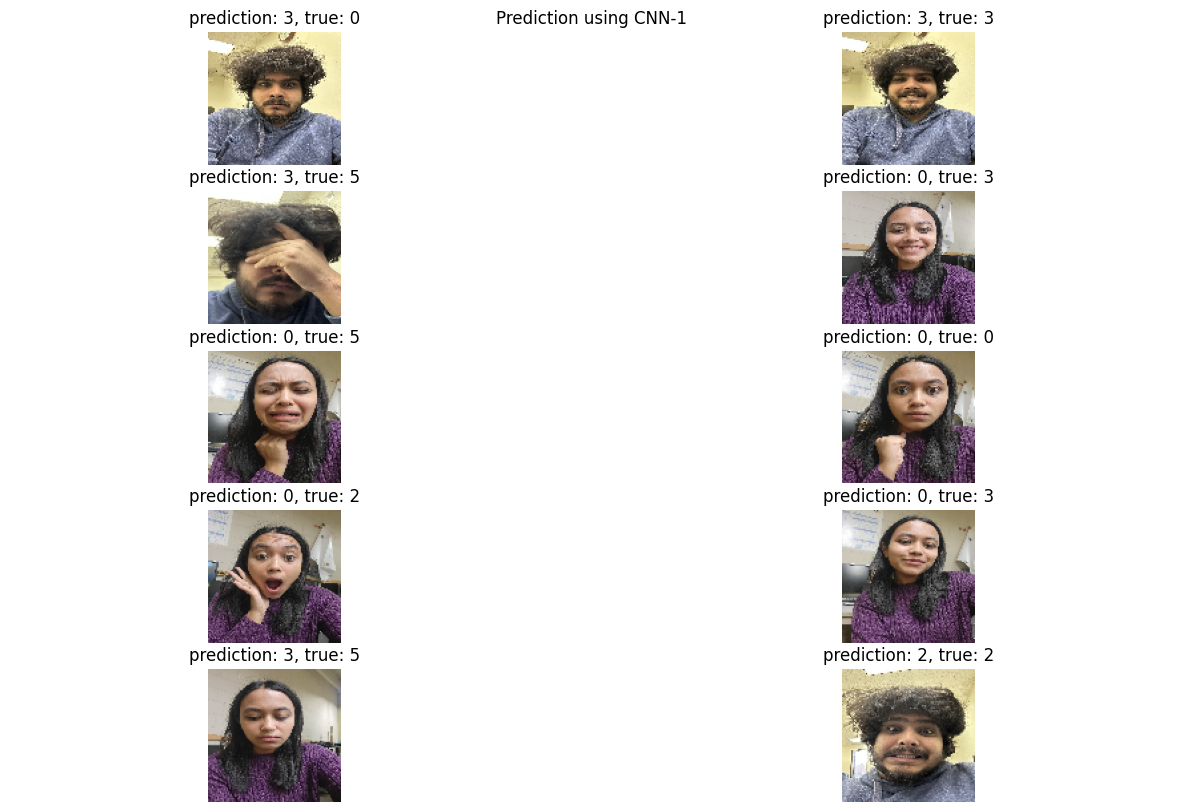

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


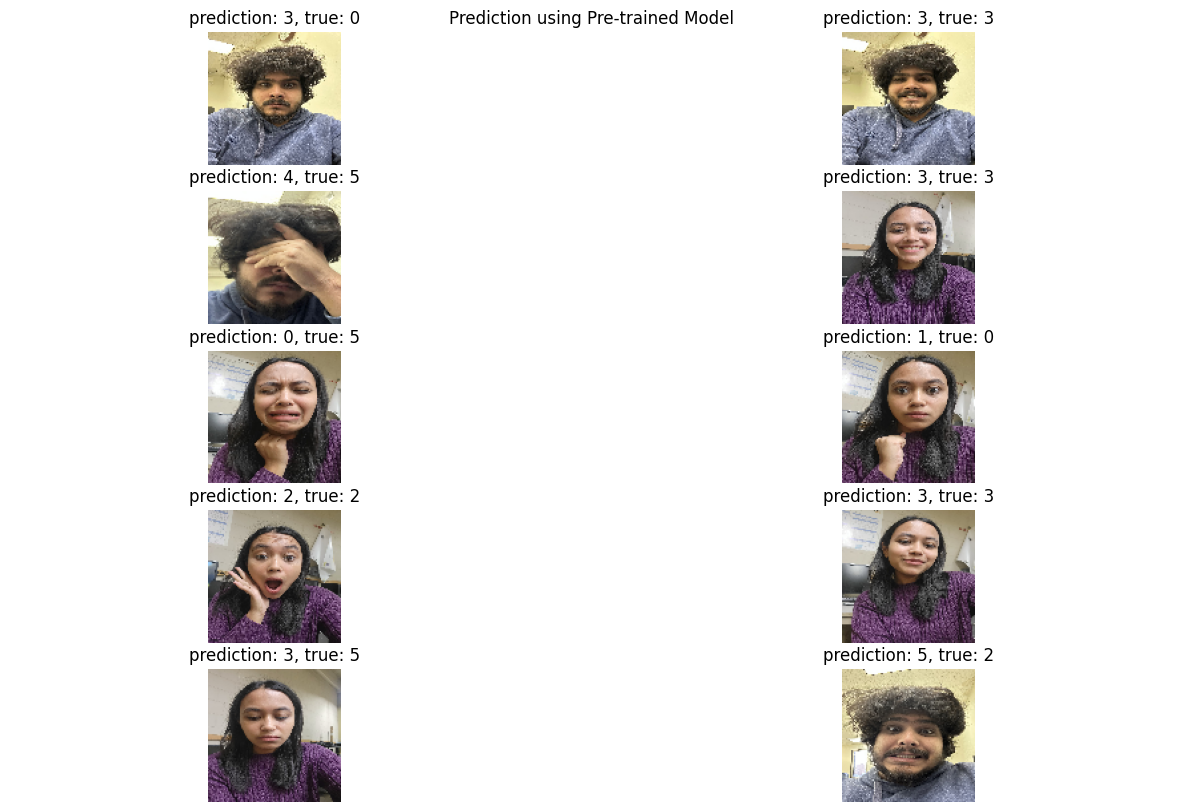

In [20]:
# Task 3
true_Test_Labels = [0 , 3, 5, 3, 5, 0, 2, 3, 5, 2]

from tensorflow.keras.preprocessing.image import load_img, img_to_array
plt.figure(figsize=[15,10])
plt.title('Prediction using CNN-1')
plt.axis('off')
for i in range(10):
    image = load_img(f'test {i+1}.jpeg', target_size= (100,100))
    image_arr = np.expand_dims(img_to_array(image), axis = 0)
    prediction = cnn1_model.predict(image_arr)
    plt.subplot(5,2,i+1)
    plt.title(f'prediction: {np.argmax(prediction)}, true: {true_Test_Labels[i]}')
    plt.imshow(image_arr[0].astype('uint8'))
    plt.axis('off')

plt.show()

plt.figure(figsize=[15,10])
plt.title('Prediction using Pre-trained Model')
plt.axis('off')
for i in range(10):
    image = load_img(f'test {i+1}.jpeg', target_size= (100,100))
    image_arr = np.expand_dims(img_to_array(image), axis = 0)
    prediction = pre_trained_model.predict(image_arr)
    plt.subplot(5,2,i+1)
    plt.title(f'prediction: {np.argmax(prediction)}, true: {true_Test_Labels[i]}')
    plt.imshow(image_arr[0].astype('uint8'))
    plt.axis('off')

plt.show()

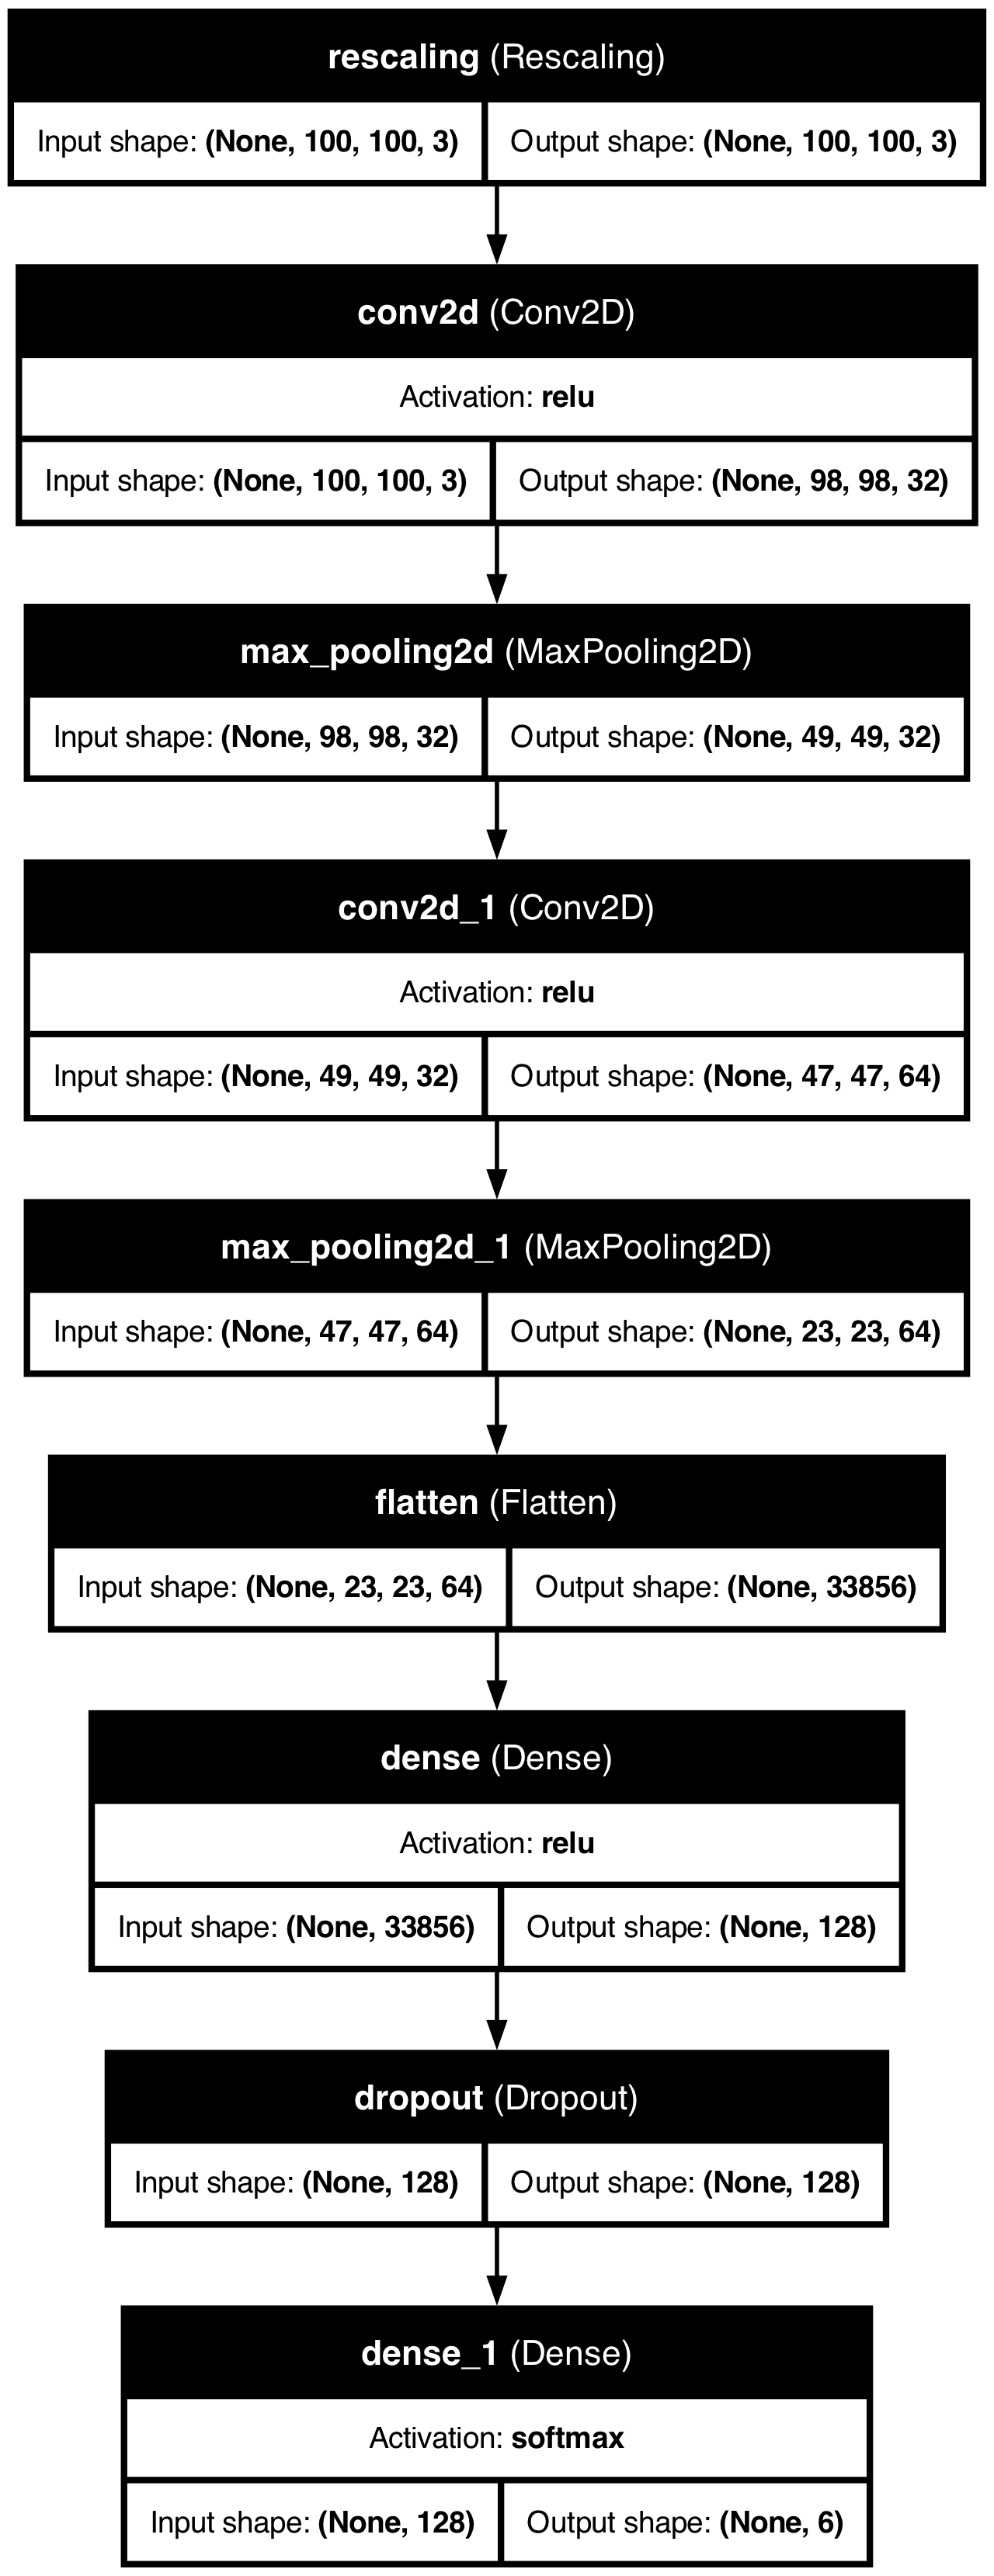

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(cnn1_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True,show_layer_activations= True)


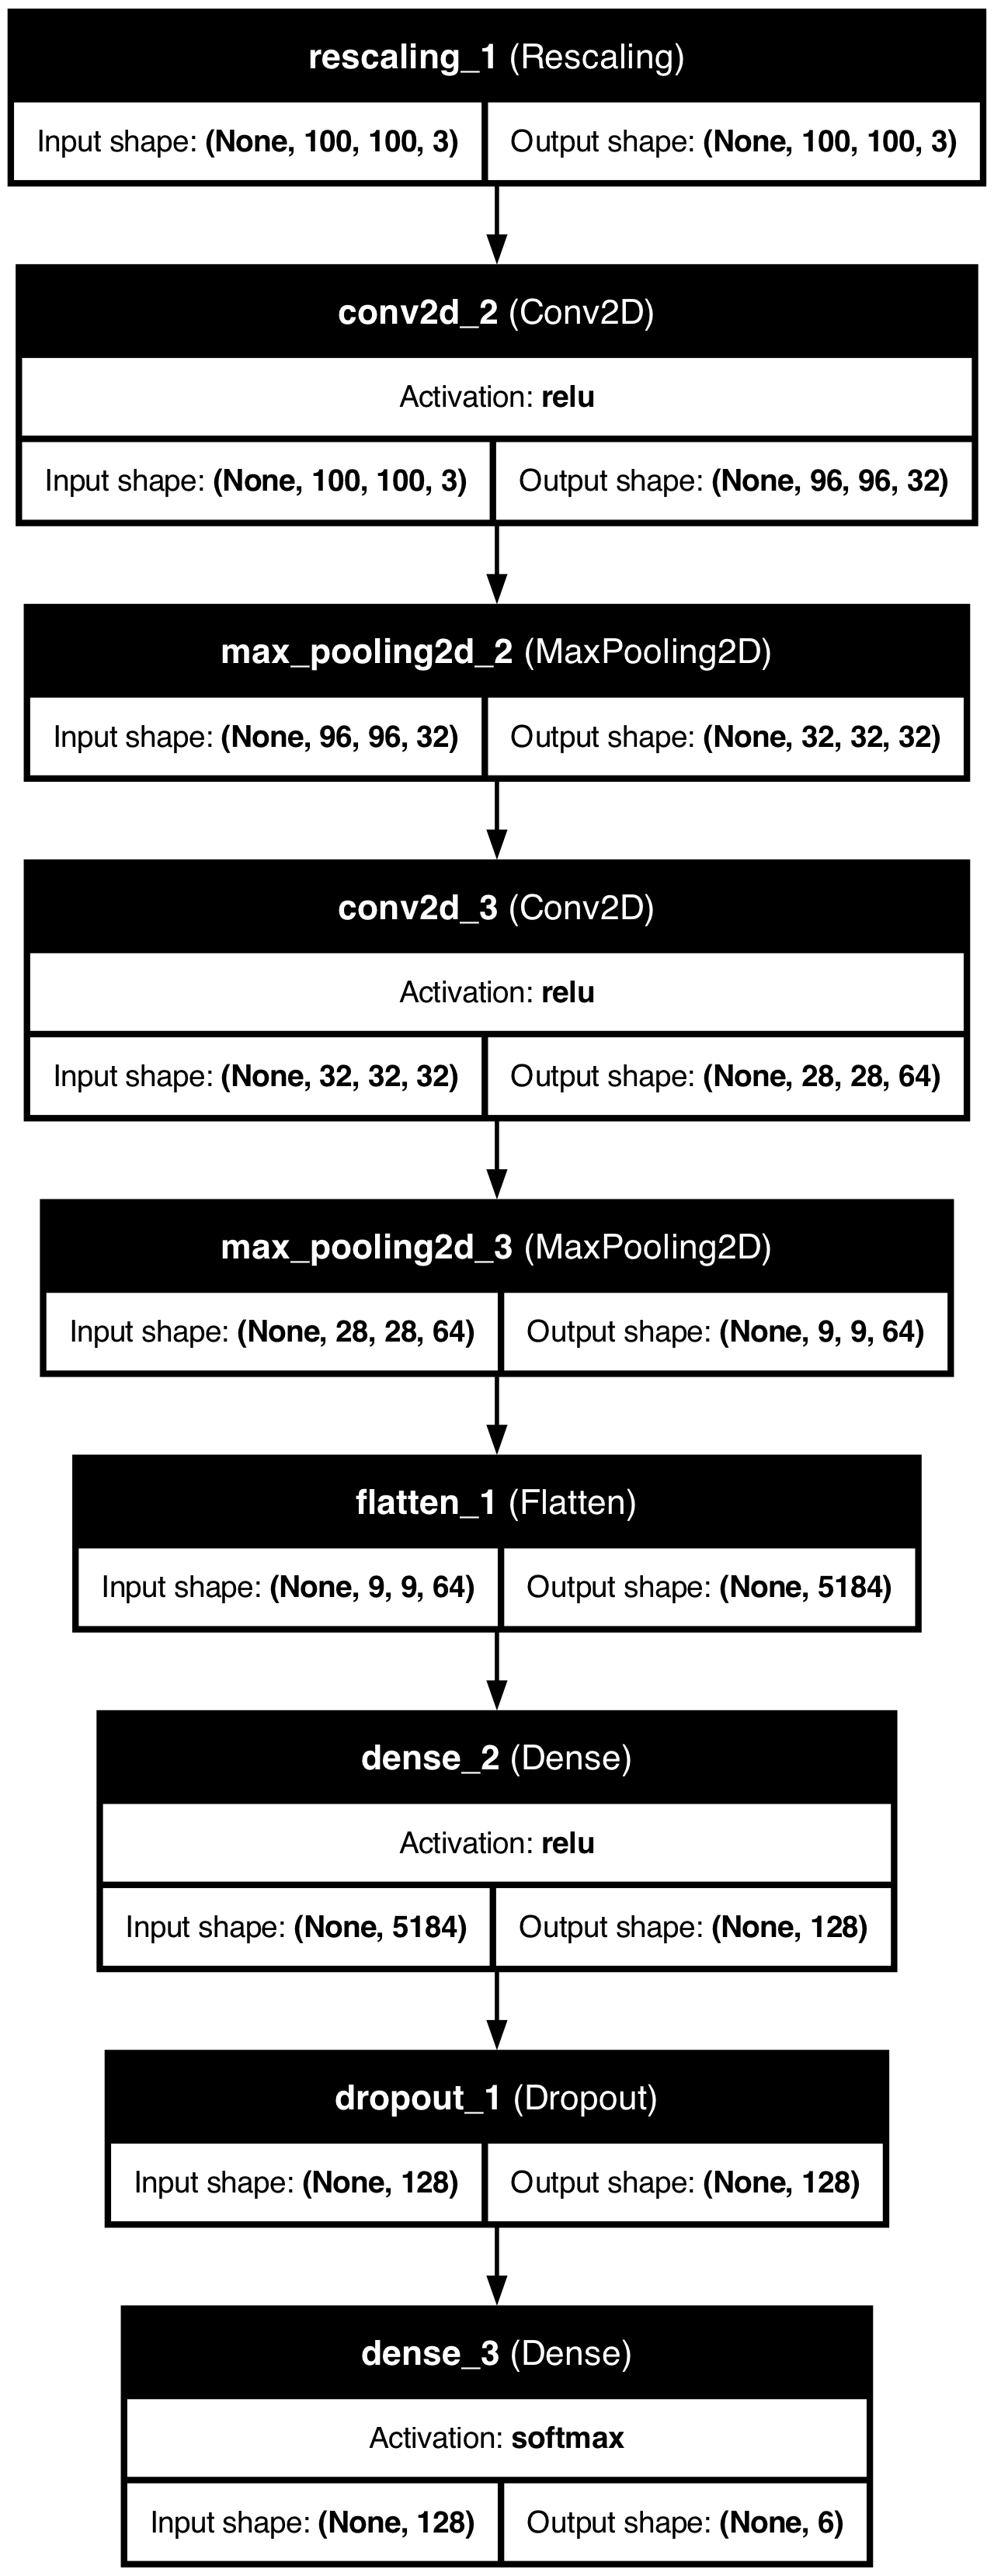

In [23]:
plot_model(cnn2_model, to_file='model_architecture2.png', show_shapes=True, show_layer_names=True,show_layer_activations= True)

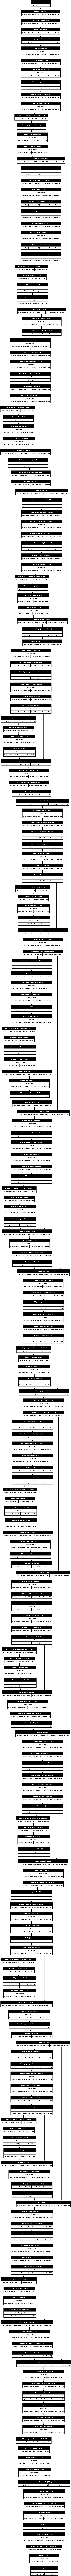

In [24]:
plot_model(pre_trained_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True,show_layer_activations= True)